# Plot

## Librairies

In [180]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Plots

In [181]:
# Choose your run file
file = os.path.join(os.getcwd(), "new_simul_19.csv")
df = pd.read_csv(file, header="infer")

In [182]:
df

,memory_length,nb_attractors,min_attractors,max_attractors,eta,tick
0,1,45,45,45,0.1500,0
1,1,45,45,45,0.1500,0
2,1,35,35,35,0.1500,0
3,1,35,35,35,0.1500,0
4,1,35,35,35,0.1500,0
...,...,...,...,...,...,...
2994,79,41,29,41,0.0075,0
2995,78,41,29,41,0.0075,0
2996,77,41,29,41,0.0075,0
2997,76,41,29,41,0.0075,0


In [183]:
steps = df.index.values                     # List of simulation steps (x-axis)
ticks = df["tick"].values.nonzero()[0]      # List of ticks (memory data points)
memory = df["memory_length"].values         # List of memory size values
nb_attractors = df["nb_attractors"].values  # List of number of attractors
learning_rates = df["eta"].values           # List of learning rates

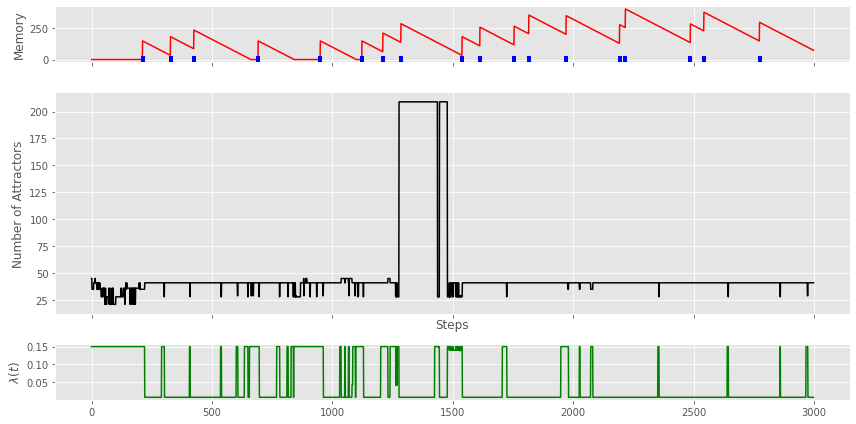

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots with custom heights for each row
fig, (ax2, ax1, ax3) = plt.subplots(3, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [0.5, 2, 0.5]})

# Plot the memory on the first subplot (ax2), which is the shorter plot
ax2.plot(steps, memory, color='red', alpha=1)
# Add vertical lines at each tick in ax1
for tick in ticks:
    ax2.axvline(x=tick, ymin=0, ymax=0.075, linewidth=4, color='blue')
ax2.set_ylabel('Memory', size=12)
ax2.tick_params(axis='y')
ax2.grid(True)

# Plot the number of attractors on the second subplot (ax1), which is the taller plot
ax1.plot(steps, nb_attractors, color='black', label='Number of Attractors')
ax1.set_xlabel('Steps', size=12)
ax1.set_ylabel('Number of Attractors', size=12)
ax1.tick_params(axis='y')
ax1.grid(True)

# Plot the learning rates
ax3.plot(steps, learning_rates, color='green', alpha=1)
ax3.set_ylabel('$\lambda(t)$', size=12)
ax3.tick_params(axis='y')
ax3.grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.savefig("plots/STDP_19.pdf")
plt.show()


In [153]:
np.set_printoptions(suppress=True)

bounds=(-0.5, 0.5)
A_init = np.random.normal(0, 1, size=(5, 6))
print("A_init\n", np.round(A_init, 2))
mask = np.random.randint(0,2, size=(5, 6), dtype=bool)      # XXX
A_init = A_init * mask
print("A_init\n", np.round(A_init, 2))
dim = A_init.shape[0], A_init.shape[1]
mu_A = 100*np.random.normal(0, 1, size=dim)
sigma2_A = np.abs(np.random.normal(0, 1, size=dim))
mu_A
A = np.random.normal(mu_A, sigma2_A, size=dim)
A = A * mask
print("A\n", np.round(A, 2))
A = np.maximum(A, A_init + bounds[0])  # clipping values (adding negative bound)
A = np.minimum(A, A_init + bounds[1])  # clipping values (adding positive bound)
print("clipped A\n", np.round(A, 2))

A_init
 [[-0.26  0.42  0.41  1.11  1.18  0.49]
 [-0.05  1.18  1.02 -2.35  0.15 -0.18]
 [ 0.54  0.31 -0.27 -0.72  0.31 -1.85]
 [ 0.99  0.08 -1.61  0.63 -0.22 -0.37]
 [-0.96 -1.06  0.07  1.59 -2.62 -0.52]]
A_init
 [[-0.    0.    0.41  0.    0.    0.  ]
 [-0.    0.    1.02 -0.    0.   -0.18]
 [ 0.54  0.31 -0.27 -0.72  0.31 -0.  ]
 [ 0.99  0.   -1.61  0.63 -0.22 -0.  ]
 [-0.96 -0.    0.    1.59 -2.62 -0.  ]]
A
 [[  -0.      0.   -142.88    0.      0.      0.  ]
 [  -0.     -0.    -63.91    0.     -0.     37.21]
 [ -59.87 -323.49   69.15  -83.9    -8.75    0.  ]
 [  34.61   -0.     11.79   -4.07  148.11    0.  ]
 [  64.15   -0.     -0.   -104.87  -13.74    0.  ]]
clipped A
 [[-0.    0.   -0.09  0.    0.    0.  ]
 [-0.   -0.    0.52  0.   -0.    0.32]
 [ 0.04 -0.19  0.23 -1.22 -0.19  0.  ]
 [ 1.49 -0.   -1.11  0.13  0.28  0.  ]
 [-0.46 -0.   -0.    1.09 -3.12  0.  ]]


In [154]:
# to be continued

In [163]:
def STDP(A, x_tminus1, x_t, A_init, eta=0.01, plumb=1, bounds=(-0.5, 0.5)):
    """
    Applies a targeted STDP (Spike-Timing Dependent Plasticity) rule to non-interactive connections in matrix A.
    
    Args:
        A (np.ndarray): Current weight matrix.
        x_tminus1 (np.ndarray): State vector at time t-1.
        x_t (np.ndarray): State vector at time t.
        A_init (np.ndarray): Default (initial) weight matrix for bounding weight changes.
        eta (float, optional): Learning rate for STDP. Defaults to 0.01.
        plumb (float, optional): Coefficient favoring weight decrease. Defaults to 1.
        bounds (tuple, optional): Tuple of lower and upper bounds for weight changes. Defaults to (-0.5, 0.5).

    Returns:
        np.ndarray: Updated weight matrix A.
    """
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if A[j,i] != 0:  # Only apply STDP to non-zero connections
                # Introduce noise to learning rate by modifying eta slightly
                factor = 1 # (1.05 - 0.95) * np.random.random_sample() + 0.95 # XXX
                eta_modified = eta * factor
                # Calculate the new weight with STDP adjustments
                temp_weight = A[j,i] + eta_modified * (x_t[i].item() * x_tminus1[j].item() - plumb * x_tminus1[i].item() * x_t[j].item())

                # Clip the weight within bounds defined by A_init and bounds parameter
                A[j,i] = np.clip(temp_weight, A_init[j,i] + bounds[0], A_init[j,i] + bounds[1])

                if A[j][i] == 0:
                    print("Connection dead...")

    return A

In [164]:
def StochasticSynapses(A_init, mu_A, sigma2_A, bounds=(-0.5, 0.5)):
    """
    Applies a stochastic plasticity to (non-interactive) connections of matrix A.
    Each non-zero weight a_ij of A is sampled in the normal distribution N(mu_ij, sigma2_ij)
    If A stretches beyond the bounds [A_init + bounds[0], A_init + bounds[0]], then it is clipped.
    
    Args:
        A_init (np.ndarray): Default (initial) weight matrix for bounding weight changes.
        mu_A (np.ndarray): Matrix of means w.r.t. which the new weights will be sampled.
        sigma2_A (np.ndarray): Matrix of variances w.r.t. which the new weights will be sampled.
        bounds (tuple, optional): Tuple of lower and upper bounds for weight changes. Defaults to (-0.5, 0.5).

    Returns:
        np.ndarray: Updated weight matrix A.
    """

    mask = A_init != 0
    dim = A_init.shape[0], A_init.shape[1]
    A = np.random.normal(mu_A, sigma2_A, size=dim)
    A = A * mask
    A = np.maximum(A, A_init + bounds[0])  # clipping values (adding negative bound)
    A = np.minimum(A, A_init + bounds[1])  # clipping values (adding positive bound)
    
    return A_init, A, mu_A, sigma2_A

In [168]:
def GSP(A_init, A_minus1, A, mu_A, sigma2_A, eta=0.1, reward=0, bounds=(-0.5, 0.5)):

    if reward > 0:

        A_diff_sign = ((A_minus1 - A) > 0) * 2 - 1

        # XXX this rule can be more sophisticated
        mu_A = mu_A + (eta * A_diff_sign)                    # update mean (shifting)
        sigma2_A = np.maximum(sigma2_A - eta * sigma2_A, 0)  # update std (decreasing)

        A_init, A, mu_A, sigma2_A = StochasticSynapses(A_init, mu_A, sigma2_A, bounds=(-0.5, 0.5))

    return A_init, A, mu_A, sigma2_A

In [169]:

eta= 0.1

A = np.random.normal(size=(5, 5))
A_minus1 = np.random.normal(size=(5, 5))
mu_A = np.random.normal(size=(5, 5))
sigma2_A = np.abs(np.random.normal(size=(5, 5)))
print(A)
print(mu_A)
print(sigma2_A)

A_diff_sign = ((A_minus1 - A) > 0) * 2 - 1

mu_A = mu_A + (eta * A_diff_sign)      # update mean (shifting)
sigma2_A = np.maximum(sigma2_A - eta * sigma2_A, 0)  # update std (decreasing)

A = np.random.normal(mu_A, sigma2_A, size=A.shape) # sample new A

A, mu_A, sigma2_A


[[ 0.01990751  0.70835384 -1.20248063  0.44490908 -0.70548764]
 [ 0.31761404 -1.57756297  1.49193798  0.43561251 -2.24342685]
 [-1.48732764 -0.35666809  1.23794826  0.21062795 -2.05129406]
 [-1.51452728 -0.38047811  1.45344223  1.53013185  0.81805468]
 [-0.97148397  1.29187958 -0.35787154  0.76353381 -1.17190471]]
[[-0.12294778 -0.34807843 -0.39995854 -0.58550086 -1.55960584]
 [ 0.72013255 -0.52873807  0.53066064 -0.42171491  0.17926774]
 [-1.07842947 -0.49579383 -0.46325855  0.01111749 -0.58304734]
 [ 0.46779321  0.98699185 -1.2524297   0.77367442  0.68549581]
 [-1.0750257   0.0006818  -1.23554085  0.27158704  0.20213115]]
[[1.55382833 1.63279869 0.62423318 1.38330906 1.25614639]
 [0.00828337 1.19317315 0.43279728 1.58187306 0.14675889]
 [0.5331848  1.47286159 1.18768022 1.03218673 0.91729379]
 [1.23692911 0.27146386 1.24173668 0.56744528 0.50068411]
 [0.90842125 0.63502273 1.57904133 0.62341706 0.92148075]]


(array([[-1.66457235,  0.18195731, -0.98358157, -0.8052547 ,  0.31198621],
        [ 0.62157301, -2.28662499,  0.51233514,  0.37557279,  0.06138641],
        [-0.74696403, -1.88935423, -0.90011592, -0.65633817, -0.15145479],
        [-0.30847849,  0.44532626, -0.45906307,  0.94481699, -0.02946362],
        [-1.03083781,  0.24267298, -1.52858456,  0.37811058,  0.2260301 ]]),
 array([[-0.22294778, -0.44807843, -0.29995854, -0.68550086, -1.45960584],
        [ 0.62013255, -0.62873807,  0.43066064, -0.52171491,  0.27926774],
        [-0.97842947, -0.39579383, -0.56325855,  0.11111749, -0.48304734],
        [ 0.36779321,  0.88699185, -1.3524297 ,  0.67367442,  0.58549581],
        [-0.9750257 , -0.0993182 , -1.33554085,  0.17158704,  0.30213115]]),
 array([[1.3984455 , 1.46951882, 0.56180986, 1.24497815, 1.13053175],
        [0.00745503, 1.07385583, 0.38951755, 1.42368575, 0.132083  ],
        [0.47986632, 1.32557543, 1.0689122 , 0.92896805, 0.82556441],
        [1.1132362 , 0.24431748, 1.1